# SER - LSTM on RAVDESS (English) only

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df_mfcc = pd.read_csv('/content/drive/MyDrive/ravdess_mfcc_mean.csv') 

In [ ]:
df_mfcc.head()

,file,emotion,emotion_label,dataset,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
0,03-01-01-01-02-02-06.wav,1,neutral,ravdess,-710.79780,53.439884,-15.190397,8.793198,-0.554165,-10.416554,...,-8.738665,-2.204105,-5.876750,-3.916210,-5.274551,-3.837144,-3.003580,-3.944510,-5.300639,-4.574412
1,03-01-01-01-02-02-12.wav,1,neutral,ravdess,-676.56665,52.879017,4.699556,6.543307,4.021244,-2.198579,...,-8.157342,-2.291066,-7.150641,-2.611762,-0.946685,-9.005078,-5.436606,-2.201399,-7.016598,-4.207880
2,03-01-03-01-01-02-06.wav,3,happy,ravdess,-574.16920,42.048836,-50.638577,7.814414,-3.251384,-23.890253,...,-17.436363,-2.909546,-5.733043,-9.023292,-3.229995,-9.130769,-7.111090,-0.888517,-3.120326,-4.910990
3,03-01-03-01-01-02-12.wav,3,happy,ravdess,-600.39770,60.840874,-14.167917,8.259460,2.347058,-7.515831,...,-4.999807,2.084753,-7.822709,-2.762776,0.491094,-5.751363,-5.363528,0.215265,-4.589694,-0.819311
4,03-01-04-01-01-02-02.wav,4,sad,ravdess,-668.93360,55.743156,-10.204071,9.223741,-5.716845,-2.916350,...,-5.563672,-3.409941,-5.798491,0.649065,-6.239035,-3.230912,-4.998880,-2.160484,-5.506312,-2.222621


In [ ]:
X = df_mfcc.iloc[:,4:].values
Y = df_mfcc['emotion_label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , Y
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=21
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 20), (96, 20), (384, 3), (96, 3))

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((384, 20, 1), (384, 3), (96, 20, 1), (96, 3))

In [ ]:
model = Sequential()
model.add(LSTM(320, return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64))
model.add(Dense(3, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 320)           412160    
                                                                 
 lstm_1 (LSTM)               (None, 64)                98560     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 510,915
Trainable params: 510,915
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
24/24 [==============================] - 7s 132ms/step - loss: 1.0448 - accuracy: 0.4141 - val_loss: 1.0442 - val_accuracy: 0.3750
Epoch 2/30
24/24 [==============================] - 2s 89ms/step - loss: 1.0038 - accuracy: 0.4505 - val_loss: 1.0672 - val_accuracy: 0.3750
Epoch 3/30
24/24 [==============================] - 2s 93ms/step - loss: 0.9616 - accuracy: 0.4896 - val_loss: 1.0065 - val_accuracy: 0.4792
Epoch 4/30
24/24 [==============================] - 2s 93ms/step - loss: 0.9481 - accuracy: 0.5260 - val_loss: 0.9742 - val_accuracy: 0.5312
Epoch 5/30
24/24 [==============================] - 2s 95ms/step - loss: 0.9237 - accuracy: 0.5469 - val_loss: 0.9795 - val_accuracy: 0.5625
Epoch 6/30
24/24 [==============================] - 2s 92ms/step - loss: 0.8907 - accuracy: 0.5547 - val_loss: 1.0233 - val_accuracy: 0.5000
Epoch 7/30
24/24 [==============================] - 4s 159ms/step - loss: 0.8718 - accuracy: 0.5703 - val_loss: 0.9935 - val_accuracy: 0.5417
Epoch 8/30


3/3 [==============================] - 1s 37ms/step - loss: 1.0044 - accuracy: 0.5104
Accuracy of our model on test data :  51.04166865348816 %


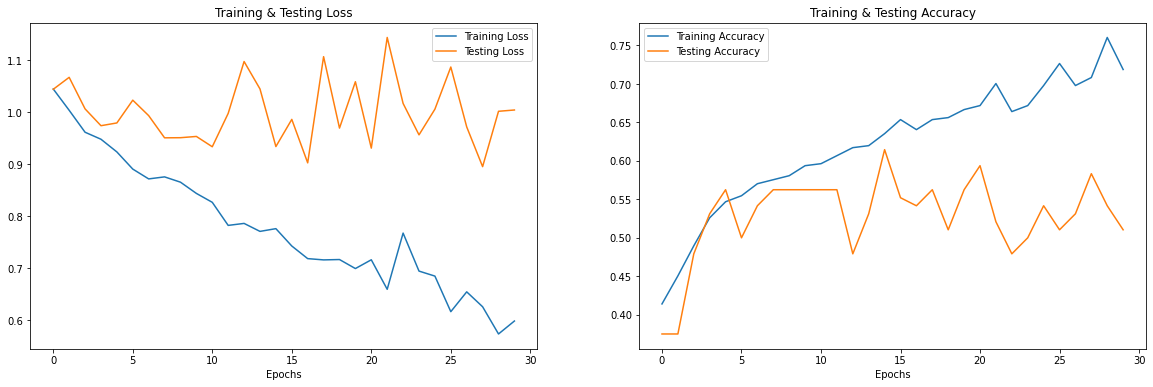

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = model_history.history['accuracy']
train_loss = model_history.history['loss']
test_acc = model_history.history['val_accuracy']
test_loss = model_history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
pred_test = model.predict(X_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,happy,neutral
1,sad,sad
2,neutral,sad
3,neutral,neutral
4,neutral,happy
5,sad,sad
6,happy,happy
7,happy,sad
8,happy,happy
9,happy,happy


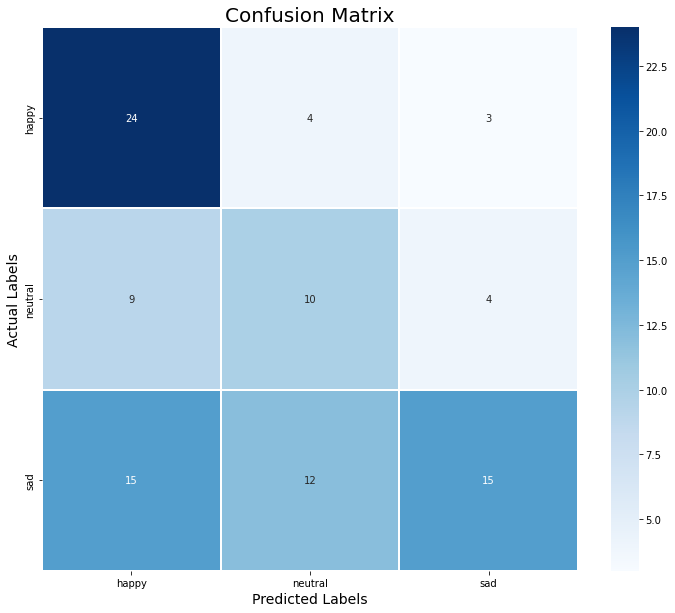

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       happy       0.50      0.77      0.61        31
     neutral       0.38      0.43      0.41        23
         sad       0.68      0.36      0.47        42

    accuracy                           0.51        96
   macro avg       0.52      0.52      0.49        96
weighted avg       0.55      0.51      0.50        96

